In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("covid19-2021-2022.csv")
df

,createDt,deathCnt,defCnt,gubunEn,incDec,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt
0,2022-04-17,16,10899,10,0,10,-,16387,2022??04??17??00??null,NaN,NaN
1,2022-04-17,153,209361,Jeju,1468,1468,0,30936,16386,2022??04??17??00??null,NaN
2,2022-04-17,1067,976778,Gyeongsangnam-do,5516,5516,0,29473,16385,2022??04??17??00??null,NaN
3,2022-04-17,1120,656804,Gyeongsangbuk-do,5053,5053,0,25006,16384,2022??04??17??00??null,NaN
4,2022-04-17,343,513157,Jeollanam-do,4396,4395,1,27998,16383,2022??04??17??00??null,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8374,2021-02-01,7,750,Jeollanam-do,1,0,1,40.22,7187,2021??02??01??00??2021-09-16 10:11:33.897,NaN
8375,2021-02-01,68,3022,Gyeongsangbuk-do,5,4,1,113.5,7186,2021??02??01??00??2021-09-16 10:11:33.897,NaN
8376,2021-02-01,9,2015,Gyeongsangnam-do,4,4,0,59.95,7185,2021??02??01??00??2021-09-16 10:11:33.897,NaN
8377,2021-02-01,0,522,Jeju,0,0,0,77.82,7184,2021??02??01??00??2021-09-16 10:11:33.897,NaN


In [2]:
# createDt : 등록 날짜
# deathCnt : 사망자 수
# defCnt : 확진자 수
# gubunEn : 시도명(영어)
# incDec : 전일대비 증감 수
# localOccCnt : 지역발생 수
# overFlowCnt : 해외유입 수
# qurRate : 10만명당 발생률
# seq : 게시글번호
# stdDay : 기준일시
# updateDt : 수정일시분초
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8379 entries, 0 to 8378
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   createDt     8379 non-null   object 
 1   deathCnt     8379 non-null   int64  
 2   defCnt       8379 non-null   int64  
 3   gubunEn      8379 non-null   object 
 4   incDec       8379 non-null   int64  
 5   localOccCnt  8379 non-null   int64  
 6   overFlowCnt  8379 non-null   object 
 7   qurRate      8379 non-null   object 
 8   seq          8379 non-null   object 
 9   stdDay       6615 non-null   object 
 10  updateDt     0 non-null      float64
dtypes: float64(1), int64(4), object(6)
memory usage: 720.2+ KB


### Data Processing

In [3]:
total = df[df['gubunEn'] == 'Total'] # gubunEn이 Total인 데이터만 추출
total = total.drop(['stdDay', 'updateDt', 'seq', 'gubunEn'], axis = 1, inplace = False) # 의미없는 Column 제거

total['createDt'] = pd.to_datetime(total['createDt']) # 날짜 데이터(createDt) datetime 변환
total['overFlowCnt'] = total['overFlowCnt'].astype(int) 
total['qurRate'] = total['qurRate'].astype(float)

total.head()

,createDt,deathCnt,defCnt,incDec,localOccCnt,overFlowCnt,qurRate
18,2022-04-17,21092,16305752,93001,92983,18,31577.0
37,2022-04-16,20889,16212751,107916,107886,30,31396.0
56,2022-04-15,20616,16104869,125846,125832,14,31188.0
75,2022-04-14,20352,15979061,148443,148408,35,30944.0
94,2022-04-13,20034,15830644,195419,195382,37,30656.0


In [4]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 18 to 8360
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   createDt     441 non-null    datetime64[ns]
 1   deathCnt     441 non-null    int64         
 2   defCnt       441 non-null    int64         
 3   incDec       441 non-null    int64         
 4   localOccCnt  441 non-null    int64         
 5   overFlowCnt  441 non-null    int32         
 6   qurRate      441 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4)
memory usage: 25.8 KB


### Correlation Analysis

#### 상관분석(Correlation Analysis)
- 두 변수간에 어떤 선형적 관계를 가지는지 분석하는 기법으로 상관계수를 이용하여 측정

#### 상관계수(Correaltion Coefficient)
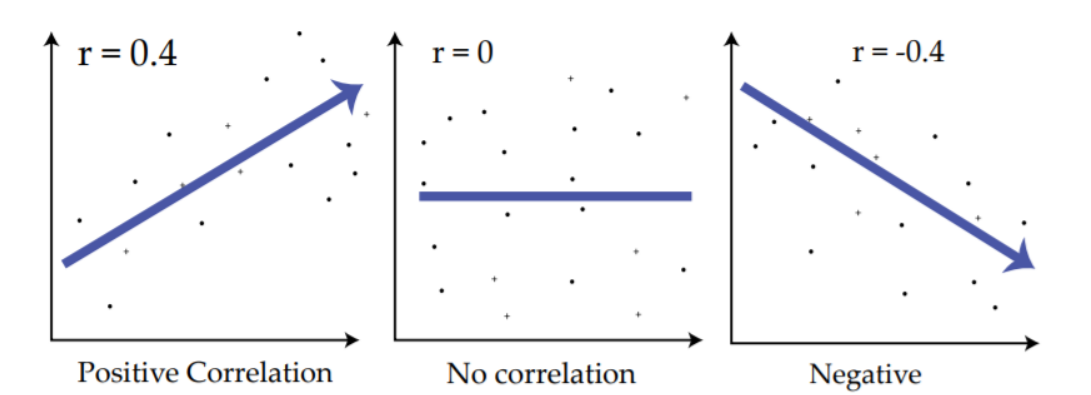
- 상관계수 r = X 와 Y가 함께 변하는 정도 또는 X와 Y가 각각 변하는 정도
- 상관계수(r)은 1 또는 -1에 가까울 수록 두 변수가 매우 상관이 있음
- 상관계수가 0이면 상관이 없다는 것보단 선형의 상관관계가 아니다는 것이 정확

In [5]:
cor = total.corr()
cor = cor.apply(lambda x: round(x ,2))
cor

,deathCnt,defCnt,incDec,localOccCnt,overFlowCnt,qurRate
deathCnt,1.00,0.95,0.77,0.77,0.24,0.95
defCnt,0.95,1.00,0.78,0.78,-0.02,1.00
incDec,0.77,0.78,1.00,1.00,0.05,0.78
localOccCnt,0.77,0.78,1.00,1.00,0.05,0.78
overFlowCnt,0.24,-0.02,0.05,0.05,1.00,-0.02
qurRate,0.95,1.00,0.78,0.78,-0.02,1.00


In [6]:
s = cor.unstack()
s

deathCnt     deathCnt       1.00
             defCnt         0.95
             incDec         0.77
             localOccCnt    0.77
             overFlowCnt    0.24
             qurRate        0.95
defCnt       deathCnt       0.95
             defCnt         1.00
             incDec         0.78
             localOccCnt    0.78
             overFlowCnt   -0.02
             qurRate        1.00
incDec       deathCnt       0.77
             defCnt         0.78
             incDec         1.00
             localOccCnt    1.00
             overFlowCnt    0.05
             qurRate        0.78
localOccCnt  deathCnt       0.77
             defCnt         0.78
             incDec         1.00
             localOccCnt    1.00
             overFlowCnt    0.05
             qurRate        0.78
overFlowCnt  deathCnt       0.24
             defCnt        -0.02
             incDec         0.05
             localOccCnt    0.05
             overFlowCnt    1.00
             qurRate       -0.02
qurRate   

In [7]:
# 변수간의 상관관계
cor_df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
cor_df.style.background_gradient(cmap='viridis')

### Multi Regression

#### 다중회귀분석(Multi Regression Analysis)
- 두 개 이상의 독립변수들과 하나의 종속변수의 관계를 분석하는 기법
- 독립변수 : 영향을 미칠 것으로 생각되는 변수 -> 확진자 수(defCnt)를 제외한 모든 변수
- 종속변수 : 영향을 받을 것으로 생각되는 변수 -> 확진자 수(defCnt)
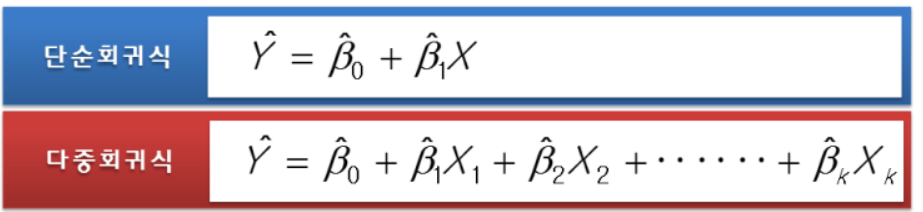

In [8]:
import statsmodels.api as sm
prediction = total[['defCnt']]

In [9]:
# 나머지 변수
mr_total = total[['deathCnt','incDec','localOccCnt','overFlowCnt','qurRate']]
mr_total

,deathCnt,incDec,localOccCnt,overFlowCnt,qurRate
18,21092,93001,92983,18,31577.00
37,20889,107916,107886,30,31396.00
56,20616,125846,125832,14,31188.00
75,20352,148443,148408,35,30944.00
94,20034,195419,195382,37,30656.00
...,...,...,...,...,...
8284,1459,370,350,20,154.54
8303,1448,451,429,22,153.83
8322,1441,467,433,34,152.96
8341,1435,336,295,41,152.06


In [10]:
# R-squared or Adj.R-squared : 데이터를 통해 현재 모델이 얼마나 잘 설명하고 있는지 나타내는 지수(보통 1에 가까울 수록 높은 설명력)
# Prob(F-statistic) : 모델에 대한 p-value(보통 0.05 이하인 경우 통계적으로 유의)
# P>[t] : 각 독립변수에 대한 p-value(보통 0.05 이하인 경우 통계적으로 유의)

mr_total = sm.add_constant(mr_total, has_constant = 'add')

multi_model = sm.OLS(prediction, mr_total)
fitted_multi_model = multi_model.fit()

fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 defCnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.901e+06
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:22:08   Log-Likelihood:                -4812.0
No. Observations:                 441   AIC:                             9636.
Df Residuals:                     435   BIC:                             9661.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         898.8773   1591.957      0.565      0.573   -2230.007    4027.762
deathCnt        0.6384      0.769      0.831      0.407      -0.872       2.149
incDec         -1.5958     20.968     -0.076      0.939     -42.806      39.614
localOccCnt     1.6081     20.967      0.077      0.939     -39.602      42.818
overFlowCnt   -15.1553     25.594     -0.592      0.554     -65.459      35.149
qurRate       515.8835      0.462   1115.978      0.000     514.975     516.792
==============================================================================
Omnibus:                     1039.367   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2954290.796
Skew:                          19.652   Prob(JB):                         0.00
Kurtosis:                     402.040   Cond. No.                     3.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Random Forest Feature importance (참고)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = total[['deathCnt','incDec','localOccCnt','overFlowCnt','qurRate']]
y = total['defCnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,  shuffle = True)

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_  # feature importance를 구해주는 함수

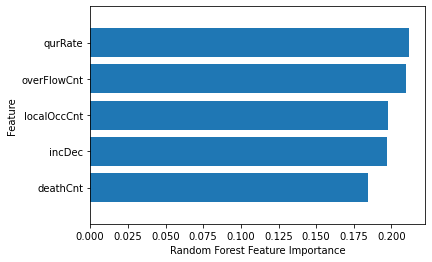

In [13]:
def plot_feature_importance(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Random Forest Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importance(rf)

### Modeling : Ridge Regression

In [14]:
# 훈련 데이터셋 : 2021년 2월 1일 ~ 2022년 1월 31일까지의 데이터
# 테스트 데이터셋 : 2022년 2월 1일 ~ 2022년 4월 17일까지의 데이터

train_date = total.query('"2021-02-01" <= createDt <= "2022-01-31"') 
test_date = total.query('"2022-02-01" <= createDt <= "2022-04-17"')

In [15]:
train_date

,createDt,deathCnt,defCnt,incDec,localOccCnt,overFlowCnt,qurRate
1462,2022-01-31,6755,845709,17085,16850,235,1638.00
1481,2022-01-30,6732,828637,17532,17303,229,1605.00
1500,2022-01-29,6712,811122,17542,17349,193,1571.00
1519,2022-01-28,6678,793582,16096,15894,202,1537.00
1538,2022-01-27,6654,777497,14518,14301,217,1506.00
...,...,...,...,...,...,...,...
8284,2021-02-05,1459,80126,370,350,20,154.54
8303,2021-02-04,1448,79756,451,429,22,153.83
8322,2021-02-03,1441,79305,467,433,34,152.96
8341,2021-02-02,1435,78838,336,295,41,152.06


In [16]:
test_date

,createDt,deathCnt,defCnt,incDec,localOccCnt,overFlowCnt,qurRate
18,2022-04-17,21092,16305752,93001,92983,18,31577.0
37,2022-04-16,20889,16212751,107916,107886,30,31396.0
56,2022-04-15,20616,16104869,125846,125832,14,31188.0
75,2022-04-14,20352,15979061,148443,148408,35,30944.0
94,2022-04-13,20034,15830644,195419,195382,37,30656.0
...,...,...,...,...,...,...,...
1367,2022-02-05,6858,971018,36362,36162,200,1874.0
1386,2022-02-04,6836,934656,27443,27283,160,1810.0
1405,2022-02-03,6812,907214,22907,22773,134,1757.0
1424,2022-02-02,6787,884310,20270,20111,159,1712.0


In [17]:
# 훈련 데이터셋
X_train = train_date[['deathCnt','incDec','localOccCnt','overFlowCnt','qurRate']]
y_train = train_date['defCnt']

# 테스트 데이터셋
X_test = test_date[['deathCnt','incDec','localOccCnt','overFlowCnt','qurRate']]
y_test = test_date['defCnt']

#### Ridge Regression
- 릿지 회귀는 기존 선형 회귀(Linear Rigression)의 과적합을 해소해주는 선형회귀 방법이다.
- 편향을 조금 높이는 대신 분산을 줄이는 방법으로 정규화를 수행

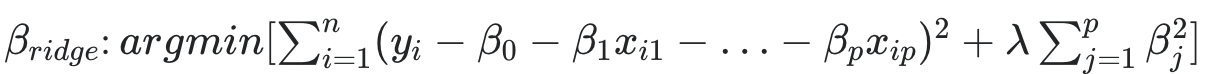

In [18]:
from sklearn.linear_model import Ridge

model = Ridge()
score = model.fit(X_train, y_train).score(X_test, y_test)
print("Test Score : {:.4f}".format(score))

Test Score : 0.9832
